<h3>8. ПРОДВИНУТЫЕ ТЕМЫ PANDAS И ЗАДАНИЯ СО ЗВЁЗДОЧКОЙ → УСКОРЯЕМ И ОПТИМИЗИРУЕМ ПАНД</h3>

In [1]:
#common imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

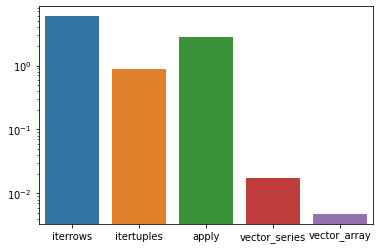

In [2]:
sns.barplot(x=['iterrows', 'itertuples', 'apply', 'vector_series', 'vector_array'],
            y=[5.88, 0.885, 2.77, 0.0175, 0.00477])
plt.yscale('log')

Step 2
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118039/">link</a>

In [3]:
#read csv data set into df
nyc = pd.read_csv('train.csv')
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


<img src='https://miro.medium.com/max/700/1*6amISXF-p34a4H9xRoJk1Q@2x.png'/>

In [4]:
def haversine(phi1, phi2, lmd1, lmd2, radius=6371):
    '''
    phi1 и phi2  — широта исходного местоположения и широта(latitude) пункта назначения в радианах, 
    lmd1 и lmd2 (lambda) -  — долгота исходного местоположения и долгота(longitude) пункта назначения в радианах,
    radius — радиус сферы, будем считать его равным 6371.
    '''
    
    #convert to radians
    phi1 = np.radians(phi1)
    phi2 = np.radians(phi2)
    lmd1 = np.radians(lmd1)
    lmd2 = np.radians(lmd2)
    
    #cash sin results
    sin_phi = np.sin((phi2 - phi1) / 2)
    sin_lmd = np.sin((lmd2 - lmd1) / 2)
    
    #haversine
    return 2 * radius * np.arcsin(np.sqrt(sin_phi * sin_phi + np.cos(phi1) * np.cos(phi2) * sin_lmd * sin_lmd))

In [5]:
point1 = {"latitude": 48.619, "longitude" : -120.412}
point2 = {"latitude": 48.59617, "longitude" : -120.4020}
expected_distance = 2.643

actual = haversine(point2["latitude"], point1["latitude"], point2["longitude"], point1["longitude"])

isclose = np.isclose(expected_distance, actual, atol=0.001)
print(f'expected {expected_distance}, actual {actual}, isclose {isclose}')


expected 2.643, actual 2.642907396923357, isclose True


In [24]:
%%timeit

nyc['distance'] = pd.Series(haversine(row['dropoff_latitude'], row['pickup_latitude'], row['dropoff_longitude'], row['pickup_longitude']) for i, row in nyc.iterrows())

5.88 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


Step 3
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118040/">link</a>
<br/>
<ul>please note:
    <li>date set 'nyc' has to be loaded in previous step</li>
    <li>'haversine' function has to be defined in previous step</li>
</ul> 

In [25]:
%%timeit

nyc['distance'] = pd.Series(haversine(row.dropoff_latitude, row.pickup_latitude, row.dropoff_longitude, row.pickup_longitude) for row in nyc.itertuples())

885 ms ± 63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


As we can see method 'itertuples' is ~7 time faster than 'iterrows'

Step 4
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118041/">link</a>
<br/>В столбец distance датафрейма nyc сохраните результат подсчета расстояния между точками отправки и прибытия, используя написанную ранее функцию. В переменную longest сохраните самое большое расстояние. Не забудьте проверить скорость выполнения операции (в код включать не нужно)! 

In [26]:
%%timeit

nyc['distance'] = nyc[['dropoff_latitude', 'pickup_latitude', 'dropoff_longitude', 'pickup_longitude']] \
    .apply(lambda row: haversine(row.dropoff_latitude, row.pickup_latitude, row.dropoff_longitude, row.pickup_longitude), axis=1)

2.77 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
longest = nyc.distance.max()

In [15]:
longest

8667.818812217454

Step 5
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118042/">link</a>
<br/>Убедимся, что векторизованные операции работают намного быстрее. Создайте функцию для подсчета расстояния haversine, описанную в первом шаге, и примените её к датасету nyc. Результат сохраните в колонку distance. 

In [27]:
%%timeit

nyc['distance'] = haversine(nyc.dropoff_latitude,
                            nyc.pickup_latitude,
                            nyc.dropoff_longitude,
                            nyc.pickup_longitude)

17.5 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


Step 6
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118043/">link</a>

In [5]:
%%timeit

nyc['distance'] = haversine(nyc.dropoff_latitude.values,
                            nyc.pickup_latitude.values,
                            nyc.dropoff_longitude.values,
                            nyc.pickup_longitude.values)

4.28 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Step 9
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118046/">link</a>
<br/>Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [7]:
nyc.query("dropoff_longitude == 0 or dropoff_latitude == 0").shape[0]

958

Step 10
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118047/">link</a>
<br/>Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных (в итоге – 4 галочки).

array([[<AxesSubplot:title={'center':'dropoff_latitude'}>,
        <AxesSubplot:title={'center':'dropoff_longitude'}>],
       [<AxesSubplot:title={'center':'pickup_latitude'}>,
        <AxesSubplot:title={'center':'pickup_longitude'}>]], dtype=object)

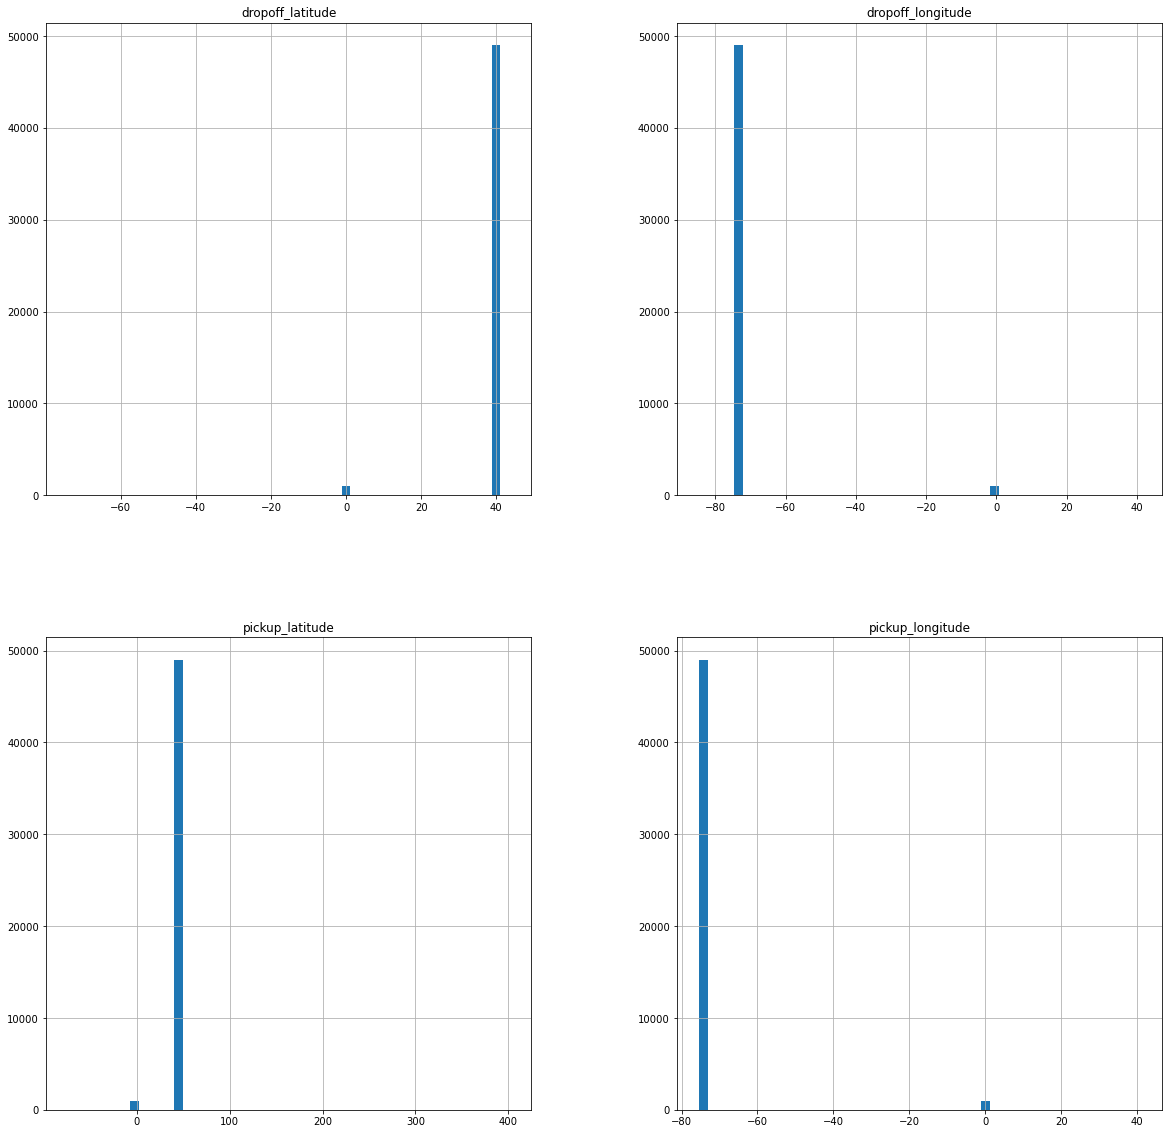

In [20]:
nyc[['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude']].hist(figsize=[20,20], bins=50)

10 < pickup_latitude < 120

pickup_longitude < -60

10 < dropoff_latitude

dropoff_longitude < -60

Step 11
<a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9045/26547/118048/">link</a>
<br/>Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [29]:
filtered = nyc \
    .query('10 < pickup_latitude and pickup_latitude < 120') \
    .query('pickup_longitude < -60') \
    .query('10 < dropoff_latitude') \
    .query('dropoff_longitude < -60') \
    .query('distance <= 50')

filtered[filtered.distance == filtered.distance.max()][['fare_amount', 'distance']]

,fare_amount,distance
33502,136.0,44.746988
